In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA, KernelPCA
from scipy.signal import savgol_filter

In [2]:
pulses = np.loadtxt('/Users/GOLASA/Desktop/MLE_Project_Data/PuBe_4inPb_Pulses.txt', delimiter=',', usecols=range(1,155))
channels = np.loadtxt('/Users/GOLASA/Desktop/MLE_Project_Data/PuBe_4inPb_Pulses.txt', delimiter=' ', usecols=0)

#pulses = np.loadtxt('/Users/GOLASA/Desktop/MLE_Project_Data/Cs137_Face_Pulses.txt', delimiter=',', usecols=range(1,155))
#channels = np.loadtxt('/Users/GOLASA/Desktop/MLE_Project_Data/Cs137_Face_Pulses.txt', delimiter=' ', usecols=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 1.100e+01,
        3.200e+01, 3.800e+01, 5.800e+01, 1.120e+02, 1.580e+02, 2.480e+02,
        3.270e+02, 3.770e+02, 4.780e+02, 4.770e+02, 5.940e+02, 6.160e+02,
        6.500e+02, 7.250e+02, 7.810e+02, 7.920e+02, 7.990e+02, 8.560e+02,
        8.640e+02, 9.280e+02, 9.560e+02, 9.600e+02, 9.900e+02, 1.039e+03,
        9.680e+02, 9.610e+02, 1.036e+03, 1.021e+03, 9.660e+02, 9.460e+02,
        9.120e+02, 9.240e+02, 8.900e+02, 8.950e+02, 9.180e+02, 8.510e+02,
        9.720e+02, 9.590e+02, 9.610e+02, 9.940e+02, 9.760e+02, 9.670e+02,
        1.012e+03, 1.065e+03, 1.059e+03, 1.066e+03, 1.128e+03, 1.205e+03,
        1.193e+03, 1.204e+03, 1.259e+03, 1.208e+03, 1.270e+03, 1.297e+03,
        1.313e+03, 1.310e+03, 1.335e+03, 1.346e+03, 1.399e+03, 1.456e+03,
        1.444e+03, 1.392e+03, 1.436e+03, 1.470e+03, 1.491e+03, 1.473e+03,
        1.446e+03, 1.458e+03, 1.569e+0

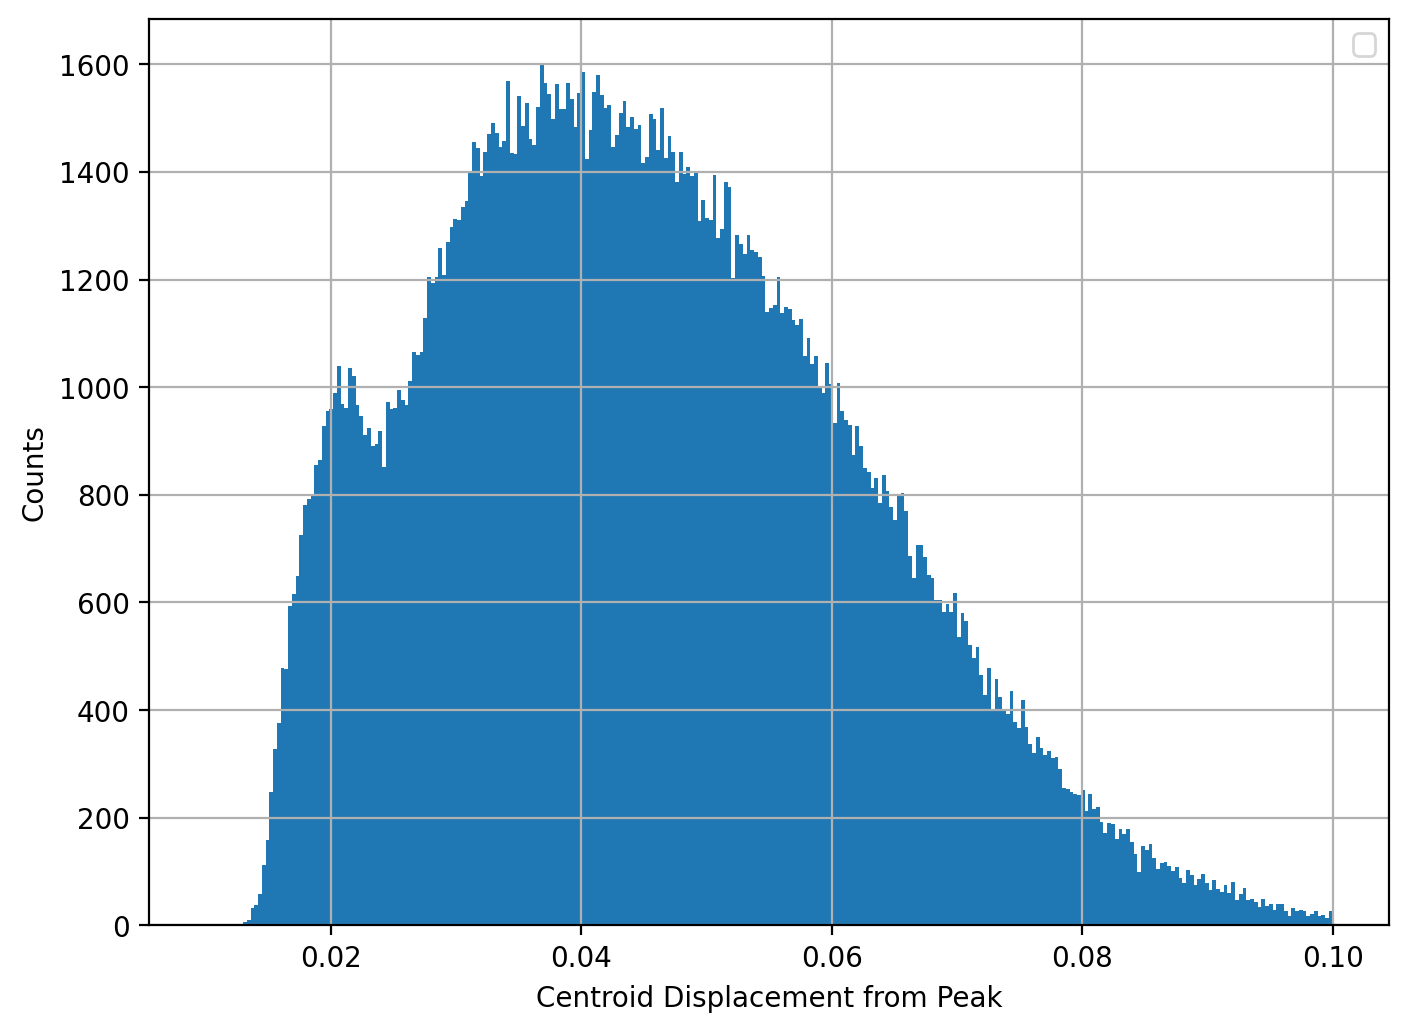

In [191]:
pulses = np.loadtxt('/Users/GOLASA/Desktop/MLE_Project_Data/PuBe_4inPb_Pulses.txt', delimiter=',', usecols=range(1,155))
channels = np.loadtxt('/Users/GOLASA/Desktop/MLE_Project_Data/PuBe_4inPb_Pulses.txt', delimiter=' ', usecols=0)

plt.figure(figsize=(8,6), dpi=200)
x = np.arange(1,155)
#x_centr = np.power(x, 2)
x_sum = np.sum(x)
#inv = np.max(pulses[1,:])
#plt.step(x, (inv - pulses[1,:]))

dataX = []
pulse_integral = []
pulse_ratio = []
centroids_pube = []

Xdata = []
ydata = []

for i in range(pulses.shape[0]):
    #if channels[i] != 1: continue
    #if i > 5000: break
    inv = np.max(pulses[i,:]) - pulses[i,:]
    normed = inv/np.max(inv)

    trunc_val = np.count_nonzero(normed == 1.0)
    if trunc_val > 2: continue
    dt = np.argmax(normed==1.0)
    xdt = x - dt
    centroid = np.sum(xdt*normed)/x_sum
    centroids_pube.append(centroid)
    
    if centroid < 0.0: continue
    if centroid > 0.1: continue

    data_inst = list(xdt*0.8) + list(normed)
    #dataX.append(data_inst)
    
    peak = np.argwhere(xdt > 0.)[0][0]
    #print(peak[0][0])
    #!break
    Qa = np.sum(inv[peak:-1])*0.8
    Qb = np.sum(inv[peak + 20 : peak + 60])*0.8
    Qratio = Qb/Qa
    pulse_integral.append(Qa)
    pulse_ratio.append(Qratio)
    if Qa > 10000.:
        if Qratio < 0.2:
            Xdata.append(normed[peak: peak+80])
            ydata.append(0)
        elif Qratio > 0.216:
            Xdata.append(normed[peak: peak+80])
            ydata.append(1)
    #plt.scatter(xdt, normed, s=1)#, c=channels[i])
    
    
#plt.scatter(pulse_integral, pulse_ratio, s=1, label='PuBe')
#
#
#pulses = np.loadtxt('/Users/GOLASA/Desktop/MLE_Project_Data/Cs137_Face_Pulses.txt', delimiter=',', usecols=range(1,155))
#channels = np.loadtxt('/Users/GOLASA/Desktop/MLE_Project_Data/Cs137_Face_Pulses.txt', delimiter=' ', usecols=0)
#dataX = []
#pulse_integral = []
#pulse_ratio = []
#centroids_pube = []
#for i in range(pulses.shape[0]):
#    #if channels[i] != 1: continue
#    #if i > 5000: break
#    inv = np.max(pulses[i,:]) - pulses[i,:]
#    normed = inv/np.max(inv)
#
#    trunc_val = np.count_nonzero(normed == 1.0)
#    if trunc_val > 2: continue
#    dt = np.argmax(normed==1.0)
#    xdt = x - dt
#    centroid = np.sum(xdt*normed)/x_sum
#    centroids_pube.append(centroid)
#    
#    if centroid < 0.0: continue
#    if centroid > 0.1: continue
#
#    data_inst = list(xdt*0.8) + list(normed)
#    #dataX.append(data_inst)
#    
#    peak = np.argwhere(xdt > 0.)[0][0]
#    #print(peak[0][0])
#    #!break
#    Qa = np.sum(inv[peak:-1])*0.8
#    Qb = np.sum(inv[peak + 20 : peak + 60])*0.8
#    Qratio = Qb/Qa
#    pulse_integral.append(Qa)
#    pulse_ratio.append(Qratio)
    
    
    #plt.scatter(xdt, normed, s=1)#, c=channels[i])
    
    
#plt.scatter(pulse_integral, pulse_ratio, s=1, label='Cs137')
#pulses[0,:]

plt.ylabel('Counts')
plt.xlabel('Centroid Displacement from Peak')

plt.legend()
plt.grid(which='both')

plt.hist(centroids_pube, bins=300, range=(0.01,0.10))
#plt.yscale('log')
#dataX = np.array(dataX)
#plt.ylim(100,3000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


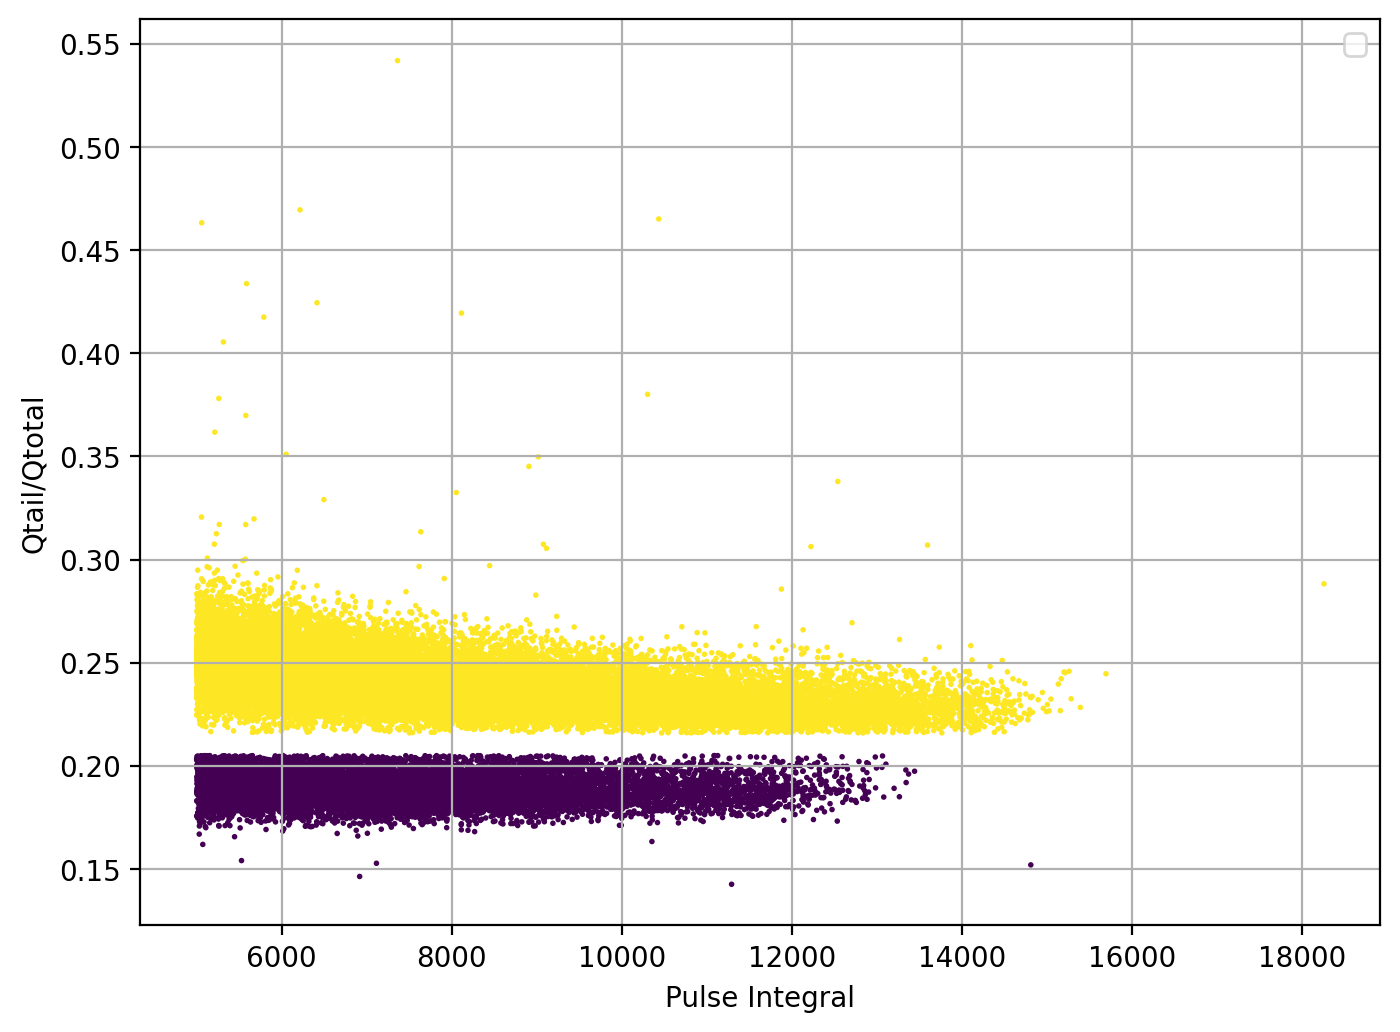

In [51]:
pulses = np.loadtxt('/Users/GOLASA/Desktop/MLE_Project_Data/PuBe_4inPb_Pulses.txt', delimiter=',', usecols=range(1,155))
channels = np.loadtxt('/Users/GOLASA/Desktop/MLE_Project_Data/PuBe_4inPb_Pulses.txt', delimiter=' ', usecols=0)

plt.figure(figsize=(8,6), dpi=200)
x = np.arange(1,155)
#x_centr = np.power(x, 2)
x_sum = np.sum(x)
#inv = np.max(pulses[1,:])
#plt.step(x, (inv - pulses[1,:]))

dataX = []
pulse_integral = []
pulse_ratio = []
centroids_pube = []

Xdata = []
ydata = []

for i in range(pulses.shape[0]):
    #if channels[i] != 1: continue
    #if i > 5000: break
    inv = np.max(pulses[i,:]) - pulses[i,:]
    normed = inv/np.max(inv)

    trunc_val = np.count_nonzero(normed == 1.0)
    if trunc_val > 2: continue
    dt = np.argmax(normed==1.0)
    xdt = x - dt
    centroid = np.sum(xdt*normed)/x_sum
    centroids_pube.append(centroid)
    
    if centroid < 0.0: continue
    if centroid > 0.1: continue

    data_inst = list(xdt*0.8) + list(normed)
    #dataX.append(data_inst)
    
    peak = np.argwhere(xdt > 0.)[0][0]
    #print(peak[0][0])
    #!break
    Qa = np.sum(inv[peak:-1])*0.8
    Qb = np.sum(inv[peak + 20 : peak + 60])*0.8
    Qratio = Qb/Qa
    #Xdata.append(normed[peak: peak+80])
    #pulse_integral.append(Qa)
    #pulse_ratio.append(Qratio)
    if Qa > 5000.:
        if Qratio < 0.205:
            Xdata.append(normed[peak: peak+70])
            ydata.append(0)
           
            pulse_integral.append(Qa)
            pulse_ratio.append(Qratio)
        elif Qratio > 0.216:
            Xdata.append(normed[peak: peak+70])
            ydata.append(1)
            pulse_integral.append(Qa)
            pulse_ratio.append(Qratio)
            
plt.scatter(pulse_integral, pulse_ratio, s=1, c=ydata)
#pulses[0,:]

plt.ylabel('Qtail/Qtotal')
plt.xlabel('Pulse Integral')

plt.legend()
plt.grid(which='both')

In [21]:
X_reduced.shape

(3271, 10)

In [25]:
np.array(ydata).shape

(3271,)

In [ ]:
plt.figure(figsize=(8,6), dpi=200)

#plt.hist(centroids_cs, bins=300, range=(0.01,0.09), density=True)
plt.hist(centroids_pube, bins=300, range=(0.0,0.15))
plt.yscale('log')

In [141]:
pube = np.loadtxt('Downloads/pulses_pube.dat')
na22 = np.loadtxt('Downloads/pulses_na22.dat')

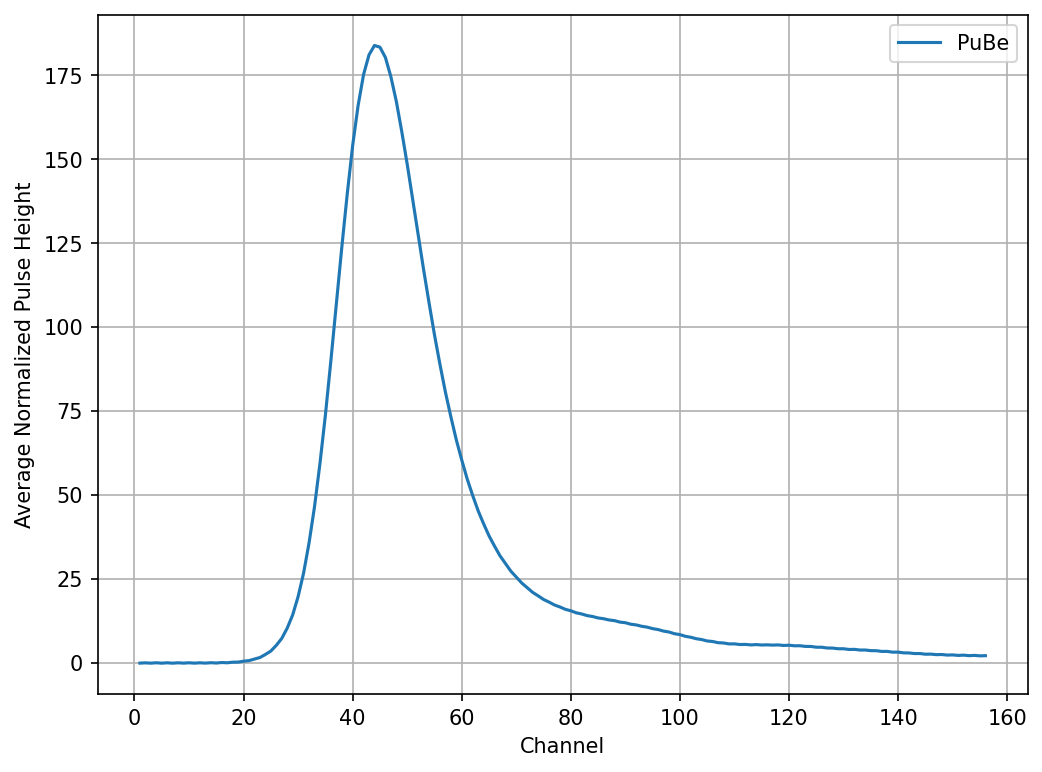

In [66]:
np.mean(pube[:,1:], axis=0)
x = np.arange(1,157)
fig = plt.figure(figsize=(8,6), dpi=150)

plt.plot(x, np.mean(pube[:,1:], axis=0), label='PuBe')
#plt.plot(x, np.mean(na22[:,1:], axis=0), label='Na22')
plt.grid(which='both')

plt.ylabel('Average Normalized Pulse Height')
plt.xlabel('Channel')

plt.legend()

In [13]:
#np.mean(pube[:,1:], axis=0)
pube[0,:]

array([ 3.100e+01,  9.000e-01, -1.000e-01, -1.000e-01, -1.000e-01,
       -1.100e+00,  1.900e+00, -1.100e+00,  9.000e-01, -1.100e+00,
       -1.000e-01,  1.900e+00,  5.900e+00,  7.900e+00,  6.900e+00,
        8.900e+00,  1.290e+01,  2.290e+01,  3.890e+01,  5.490e+01,
        7.990e+01,  1.159e+02,  1.639e+02,  2.299e+02,  2.959e+02,
        3.719e+02,  4.379e+02,  4.929e+02,  5.379e+02,  5.639e+02,
        5.759e+02,  5.789e+02,  5.719e+02,  5.549e+02,  5.229e+02,
        4.879e+02,  4.539e+02,  4.199e+02,  3.929e+02,  3.669e+02,
        3.389e+02,  3.039e+02,  2.709e+02,  2.389e+02,  2.139e+02,
        1.959e+02,  1.699e+02,  1.499e+02,  1.359e+02,  1.189e+02,
        1.069e+02,  9.290e+01,  8.490e+01,  8.390e+01,  7.290e+01,
        6.890e+01,  5.990e+01,  5.890e+01,  5.590e+01,  5.190e+01,
        4.990e+01,  4.790e+01,  4.490e+01,  3.990e+01,  3.190e+01,
        3.490e+01,  3.390e+01,  3.490e+01,  3.290e+01,  3.290e+01,
        3.390e+01,  3.090e+01,  3.090e+01,  3.190e+01,  2.590e

In [153]:
X_Q = np.array([pulse_integral, pulse_ratio]).T

In [154]:
X_Q

array([[1.07379200e+04, 2.23506973e-01],
       [1.07606400e+04, 2.19838225e-01],
       [9.64480000e+03, 1.87126742e-01],
       ...,
       [9.50680000e+03, 1.83868389e-01],
       [1.10688800e+04, 1.76928470e-01],
       [8.89680000e+03, 1.81998022e-01]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Qa/Qb')

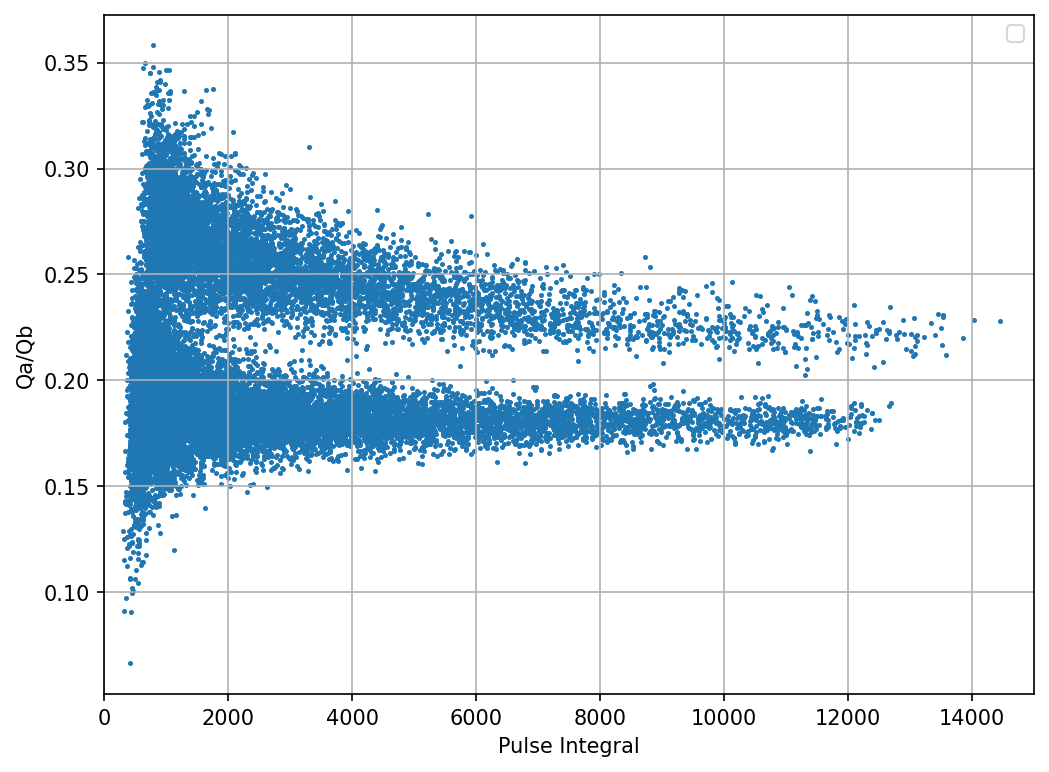

In [204]:
pube = np.loadtxt('Downloads/pulses.dat')
#na22 = np.loadtxt('Downloads/pulses_na22_unnormalized.dat')

n, c = pube.shape
x = np.arange(0, c - 1)

fig = plt.figure(figsize=(8,6), dpi=150)
xy_unsmoothed = []
Xdata = []
Xfit = []
X_testData = []
ydata = []
pulse_integral = []
pulse_ratio = []
pulse_integral_test = []
pulse_ratio_test = []
xlen = 155
for i in range(n):
    pulse_data = pube[i,1:]
    peak = np.argmax(pulse_data)
    Qb = np.sum(pulse_data[peak:])*0.8
    Qa = np.sum(pulse_data[peak+20: peak+60])*0.8
    Qratio = Qa/Qb
    xy_unsmoothed.append([Qb, Qratio])
    
    normed = pulse_data/np.max(pulse_data)
    
    if Qb > 5000:
        Xfit.append(normed[peak: peak + 70])
        if Qratio < 0.2:
            Xdata.append(normed[peak: peak+70])
            ydata.append(0)
            
           
            pulse_integral.append(Qb)
            pulse_ratio.append(Qratio)
        elif Qratio > 0.21:
            Xdata.append(normed[peak: peak+70])
            ydata.append(1)
            pulse_integral.append(Qb)
            pulse_ratio.append(Qratio)
    elif Qb > 2000:
        #if Qb < 0: continue
        #Xfit.append(normed[peak: peak + 70])
        X_testData.append(normed[peak: peak+70])
        pulse_integral_test.append(Qb)
        pulse_ratio_test.append(Qratio)
        
    
    #plt.plot(x - peak, pulse_data)
    
xy_unsmoothed = np.array(xy_unsmoothed)
plt.scatter(xy_unsmoothed[:,0], xy_unsmoothed[:,1], s=2)
#plt.scatter(xy[:,0], xy[:,1], s=2, label='Smoothed')
plt.xlim(0, 15000)

plt.legend()
plt.grid(which='both')
plt.xlabel('Pulse Integral')
plt.ylabel('Qa/Qb')

Text(0, 0.5, 'Qa/Qb')

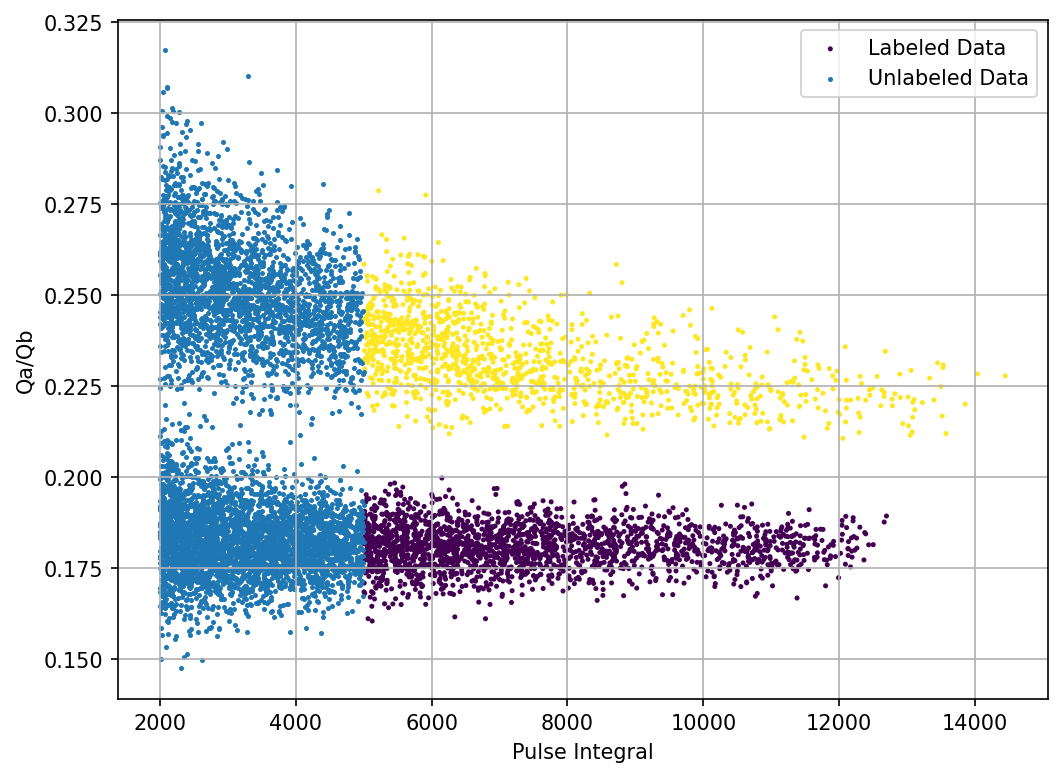

In [205]:
fig = plt.figure(figsize=(8,6), dpi=150)
plt.scatter(pulse_integral, pulse_ratio, s=2, c=ydata, label='Labeled Data')
plt.scatter(pulse_integral_test, pulse_ratio_test,s=2, label='Unlabeled Data')
plt.legend()

plt.grid(which='both')
plt.xlabel('Pulse Integral')
plt.ylabel('Qa/Qb')

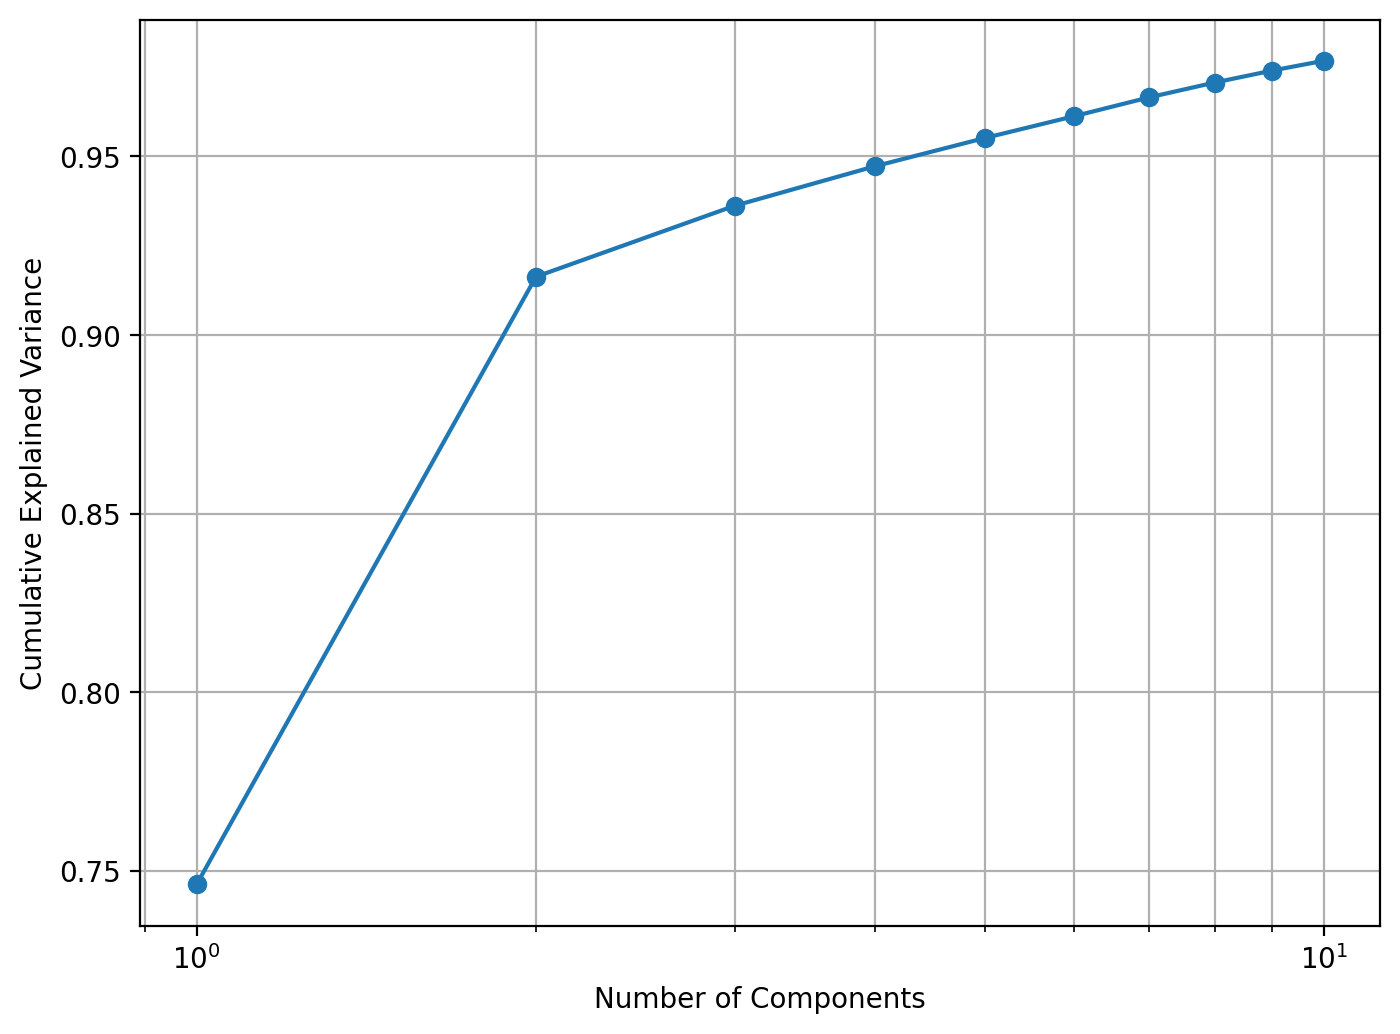

In [120]:
X = np.array(Xfit)
n_components=10
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

plt.figure(figsize=(8,6), dpi=200)
plt.plot(range(1, n_components+1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.xscale('log')

#plt.ylim(0.9,1.0)
plt.grid(which='both')

In [121]:
X = np.array(Xdata)
X_reduced = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, np.array(ydata), test_size=0.3)

model = Sequential()
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(10, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
num_epochs = 200
batch_size = 64
history = model.fit(x=X_train, y=y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, y_test))


Epoch 1/200
36/36 [==============================] - 1s 7ms/step - loss: 0.6617 - accuracy: 0.6278 - val_loss: 0.6551 - val_accuracy: 0.6232
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6278 - val_loss: 0.5947 - val_accuracy: 0.6232
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.6278 - val_loss: 0.5269 - val_accuracy: 0.6232
Epoch 4/200
36/36 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.6278 - val_loss: 0.5050 - val_accuracy: 0.6232
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.6278 - val_loss: 0.4932 - val_accuracy: 0.6232
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.6278 - val_loss: 0.4841 - val_accuracy: 0.6232
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.6278 - val_loss: 0.4767 - val_accuracy: 0.6232
Epoch 8/200
3

Epoch 59/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 1.0000 - val_loss: 0.2423 - val_accuracy: 0.9980
Epoch 60/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 1.0000 - val_loss: 0.2363 - val_accuracy: 1.0000
Epoch 61/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 1.0000
Epoch 62/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 1.0000 - val_loss: 0.2304 - val_accuracy: 1.0000
Epoch 63/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2282 - accuracy: 1.0000 - val_loss: 0.2275 - val_accuracy: 1.0000
Epoch 64/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 1.0000 - val_loss: 0.2247 - val_accuracy: 1.0000
Epoch 65/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 1.0000 - val_loss: 0.2219 - val_accuracy: 1.0000
Epoch 

36/36 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 1.0000 - val_loss: 0.1199 - val_accuracy: 1.0000
Epoch 117/200
36/36 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 1.0000 - val_loss: 0.1185 - val_accuracy: 1.0000
Epoch 118/200
36/36 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 1.0000 - val_loss: 0.1171 - val_accuracy: 1.0000
Epoch 119/200
36/36 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 1.0000 - val_loss: 0.1158 - val_accuracy: 1.0000
Epoch 120/200
36/36 [==============================] - 0s 3ms/step - loss: 0.1147 - accuracy: 1.0000 - val_loss: 0.1144 - val_accuracy: 1.0000
Epoch 121/200
36/36 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 1.0000 - val_loss: 0.1131 - val_accuracy: 1.0000
Epoch 122/200
36/36 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 1.0000 - val_loss: 0.1118 - val_accuracy: 1.0000
Epoch 123/200

36/36 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 1.0000 - val_loss: 0.0621 - val_accuracy: 1.0000
Epoch 174/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 1.0000 - val_loss: 0.0614 - val_accuracy: 1.0000
Epoch 175/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 1.0000
Epoch 176/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 1.0000 - val_loss: 0.0600 - val_accuracy: 1.0000
Epoch 177/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 1.0000 - val_loss: 0.0593 - val_accuracy: 1.0000
Epoch 178/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 0.0586 - val_accuracy: 1.0000
Epoch 179/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 1.0000
Epoch 180/200

In [122]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.045665446668863297
Test accuracy: 1.0


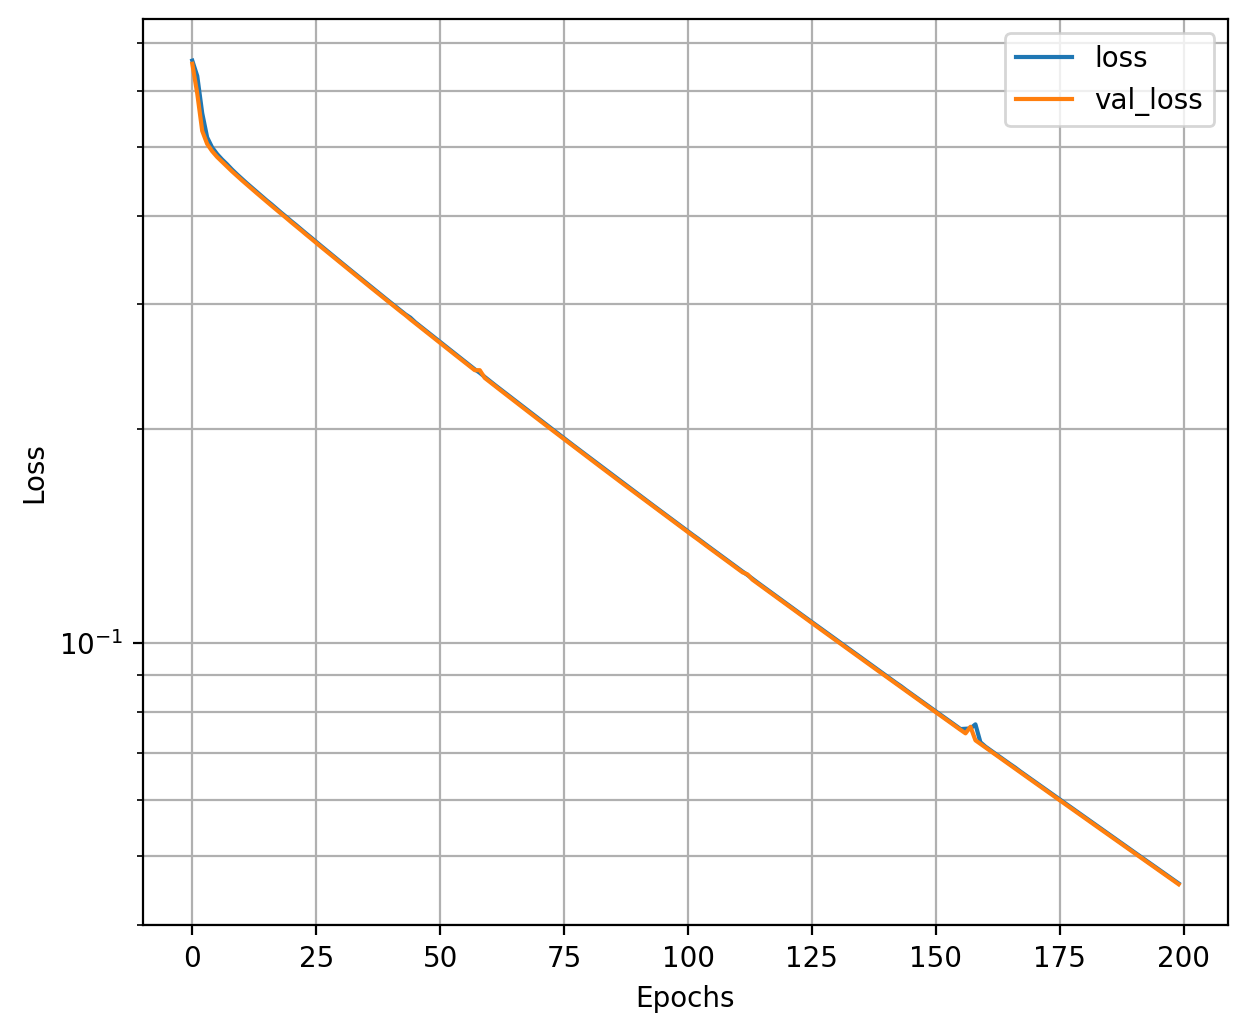

In [196]:
plt.figure(figsize=(7,6), dpi=200)
x = np.arange(len(history.history['loss']))
plt.plot(x, history.history['loss'], label='loss')
plt.plot(x, history.history['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.grid(which='both')

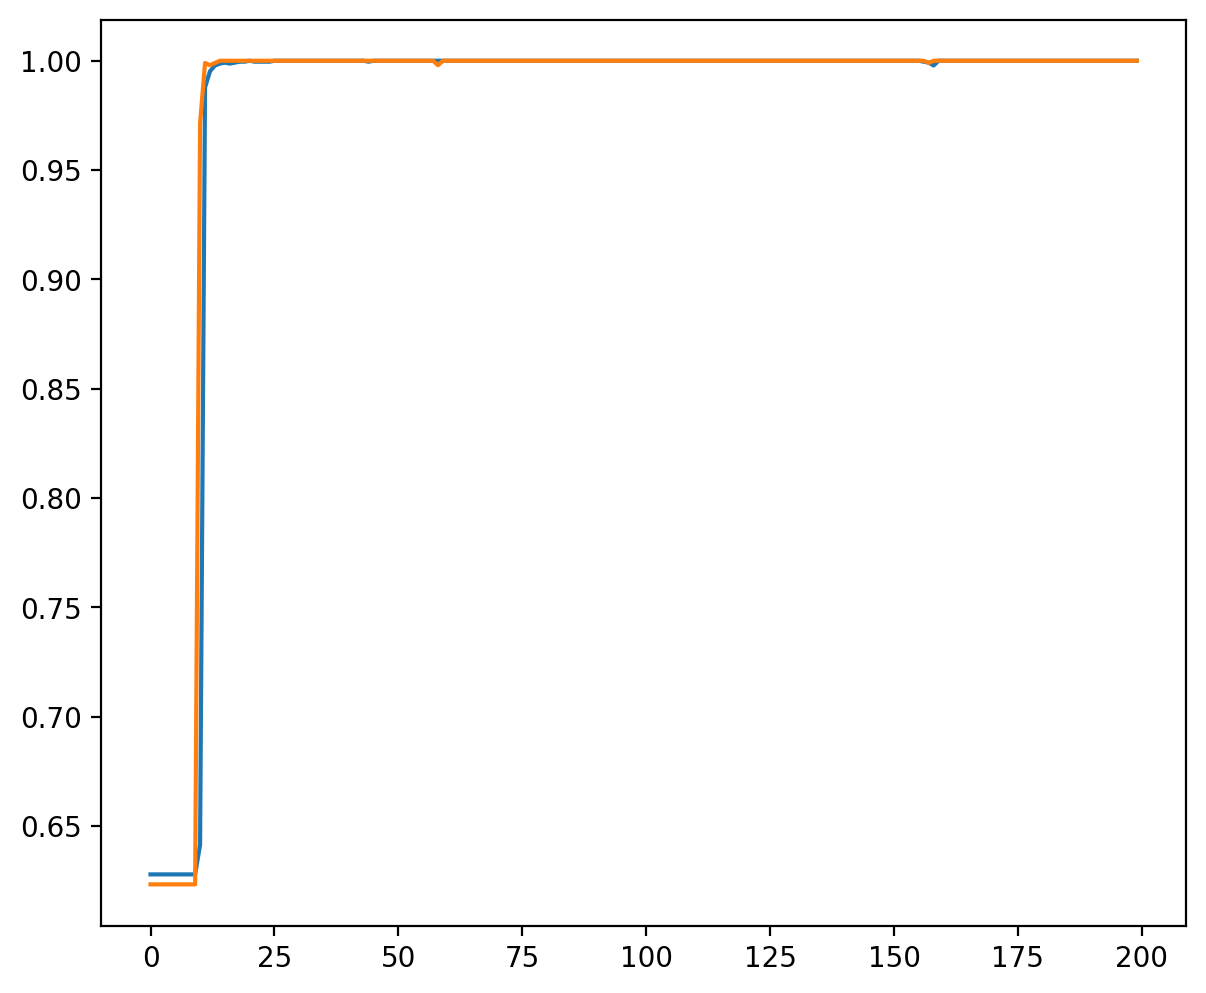

In [197]:
plt.figure(figsize=(7,6), dpi=200)
x = np.arange(len(history.history['loss']))
plt.plot(x, history.history['accuracy'])
plt.plot(x, history.history['val_accuracy'])



In [125]:
X = np.array(X_testData)
X_reduced = pca.transform(X)

In [126]:
yraw = model.predict(X_reduced)
ytest = np.round(yraw)

395/395 [==============================] - 0s 525us/step


Text(0, 0.5, 'Qa/Qb')

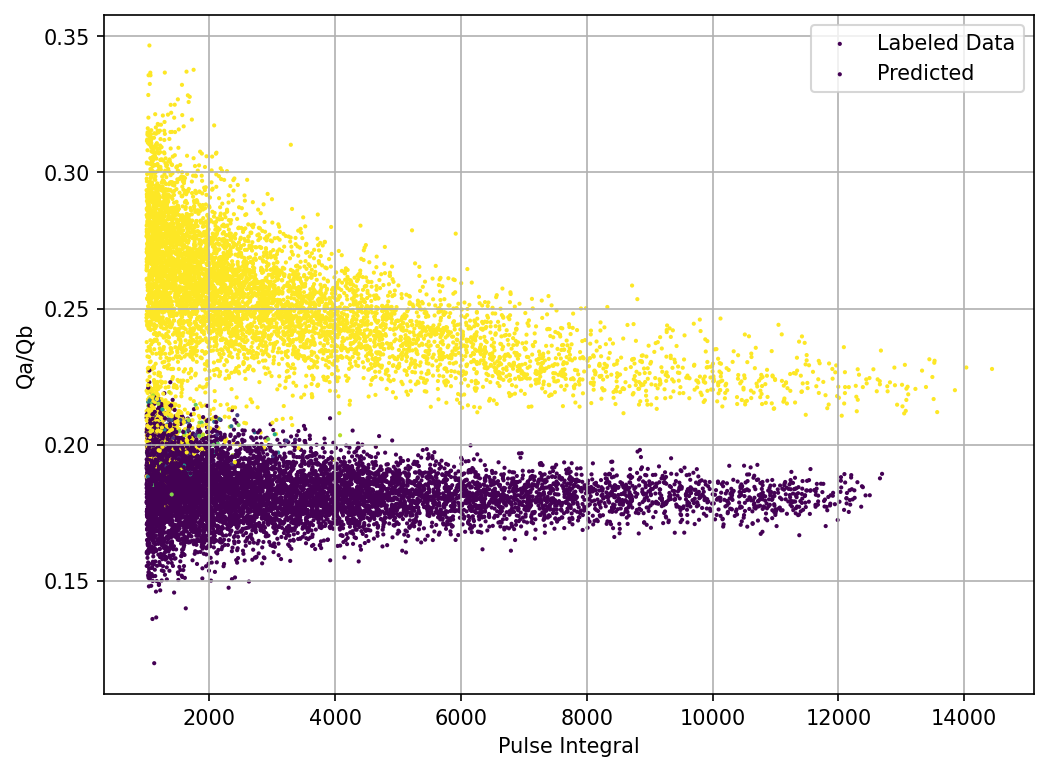

In [127]:
fig = plt.figure(figsize=(8,6), dpi=150)
plt.scatter(pulse_integral, pulse_ratio, s=1, c=ydata, label='Labeled Data')
plt.scatter(pulse_integral_test, pulse_ratio_test,s=1, c=yraw, label='Predicted')
plt.legend()

plt.grid(which='both')
plt.xlabel('Pulse Integral')
plt.ylabel('Qa/Qb')

#plt.xlim(2000,4000)
#plt.ylim(0.18,0.225)

In [82]:
np.argmin(yraw)

0

In [69]:
np.array(Xfit).shape

(9626, 70)

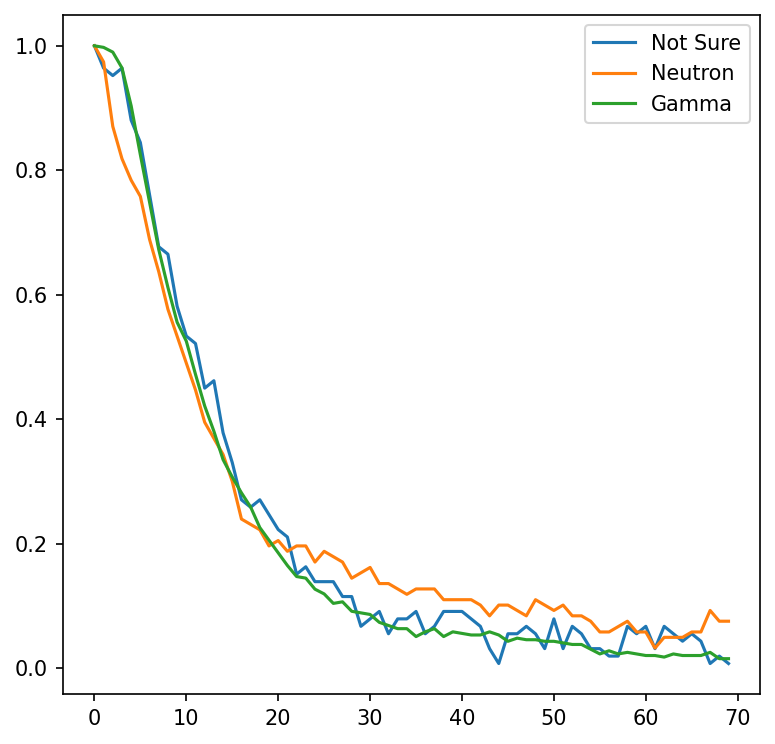

In [180]:
fig = plt.figure(figsize=(6,6), dpi=150)

plt.plot(range(70), X_testData[2849], label='Not Sure')
plt.plot(range(70), X_testData[1], label='Neutron')
plt.plot(range(70), X_testData[0], label='Gamma')

plt.legend()

Text(0, 0.5, 'Qa/Qb')

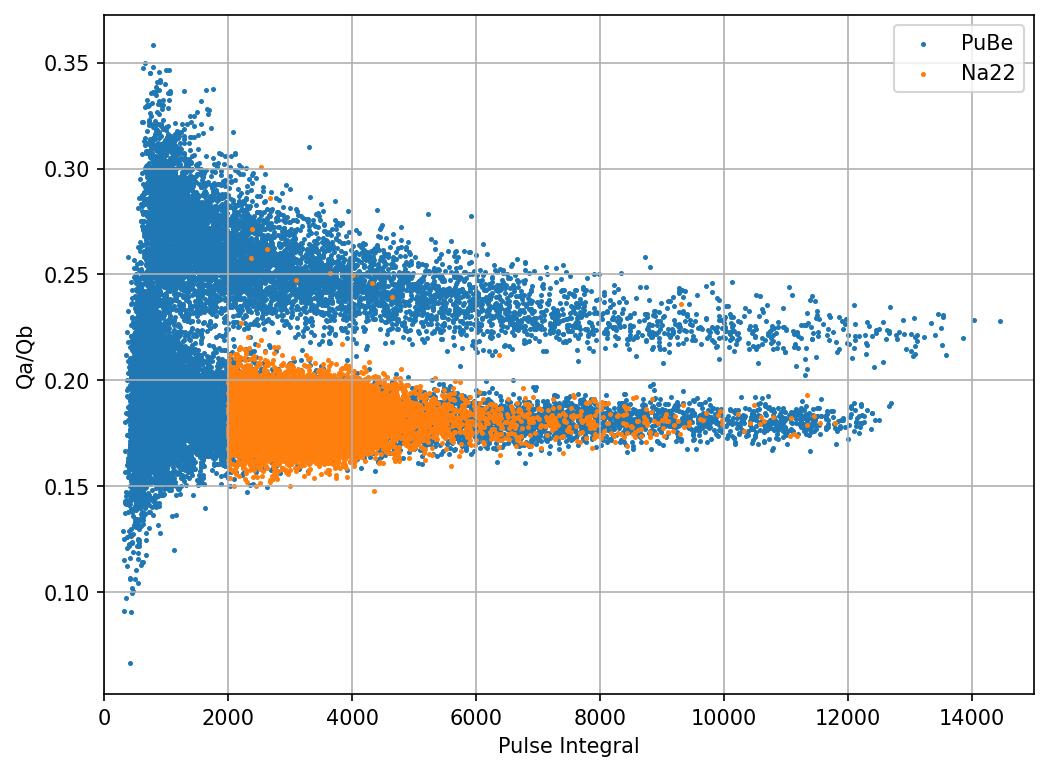

In [206]:
na22 = np.loadtxt('Downloads/Na22_Full.dat')
#na22 = np.loadtxt('Downloads/pulses_na22_unnormalized.dat')

n, c = na22.shape
x = np.arange(0, c - 1)

fig = plt.figure(figsize=(8,6), dpi=150)
xy_na22 = []
#Xdata = []
#Xfit = []
#X_testData = []
#ydata = []

pulse_integral_na22 = []
pulse_ratio_na22 = []
xlen = 155
na22_test = []
for i in range(n):
    pulse_data = na22[i,1:]
    peak = np.argmax(pulse_data)
    Qb = np.sum(pulse_data[peak:])*0.8
    Qa = np.sum(pulse_data[peak+20: peak+60])*0.8
    Qratio = Qa/Qb
    
    if Qb < 2000: continue
    xy_na22.append([Qb, Qratio])
    
    normed = pulse_data/np.max(pulse_data)

    #Xfit.append(normed[peak: peak + 70])
    na22_test.append(normed[peak: peak+70])
    pulse_integral_na22.append(Qb)
    pulse_ratio_na22.append(Qratio)
        
    
    #plt.plot(x - peak, pulse_data)
    
xy_na22 = np.array(xy_na22)
plt.scatter(xy_unsmoothed[:,0], xy_unsmoothed[:,1], s=2, label='PuBe')
plt.scatter(xy_na22[:,0], xy_na22[:,1], s=2, label='Na22')
plt.xlim(0, 15000)

plt.legend()
plt.grid(which='both')
plt.xlabel('Pulse Integral')
plt.ylabel('Qa/Qb')

422/422 [==============================] - 0s 546us/step


Text(0, 0.5, 'Qa/Qb')

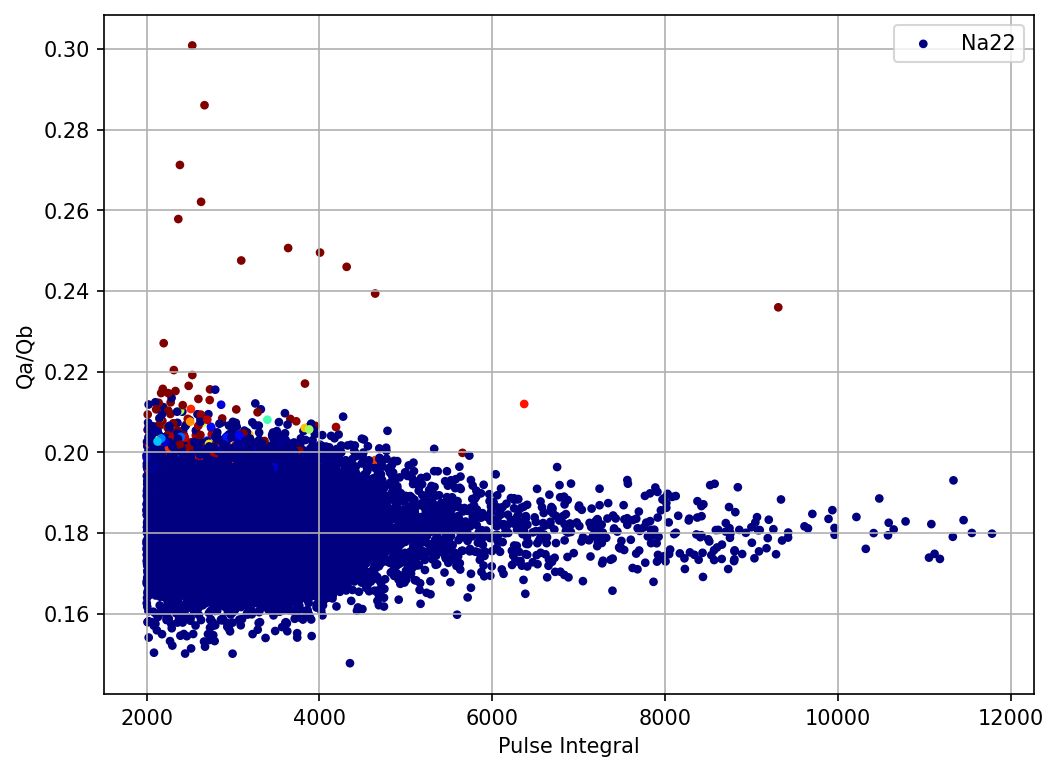

In [208]:
X = np.array(na22_test)
X_reduced = pca.transform(X)
yraw = model.predict(X_reduced)
ytest = np.round(yraw)

plt.figure(figsize=(8,6), dpi=150)
#plt.scatter(pulse_integral, pulse_ratio, s=1, c=ydata, label='Labeled Data')
plt.scatter(pulse_integral_na22, pulse_ratio_na22,s=10, c=yraw, label='Na22', cmap='jet')
plt.legend()

plt.grid(which='both')
plt.xlabel('Pulse Integral')
plt.ylabel('Qa/Qb')
#plt.xlim(0,12000)
#plt.ylim(0,0.4)

In [203]:
X[2]

array([ 1.        ,  0.98883929,  0.96651786,  0.87723214,  0.82142857,
        0.81026786,  0.77678571,  0.73214286,  0.70982143,  0.65401786,
        0.63169643,  0.59821429,  0.55357143,  0.47544643,  0.43080357,
        0.40848214,  0.36383929,  0.34151786,  0.33035714,  0.27455357,
        0.26339286,  0.25223214,  0.24107143,  0.22991071,  0.22991071,
        0.20758929,  0.19642857,  0.16294643,  0.140625  ,  0.09598214,
        0.09598214,  0.09598214,  0.09598214,  0.0625    ,  0.08482143,
        0.07366071,  0.08482143,  0.07366071,  0.0625    ,  0.07366071,
        0.07366071,  0.07366071,  0.04017857,  0.0625    ,  0.0625    ,
        0.07366071,  0.07366071,  0.04017857,  0.01785714,  0.0625    ,
        0.0625    ,  0.04017857,  0.04017857,  0.02901786,  0.02901786,
        0.02901786,  0.04017857,  0.04017857, -0.00446429,  0.00669643,
        0.00669643,  0.02901786,  0.02901786, -0.015625  ,  0.01785714,
       -0.00446429,  0.02901786,  0.02901786,  0.01785714,  0.02

Text(0, 0.5, 'Normalized Pulse Height')

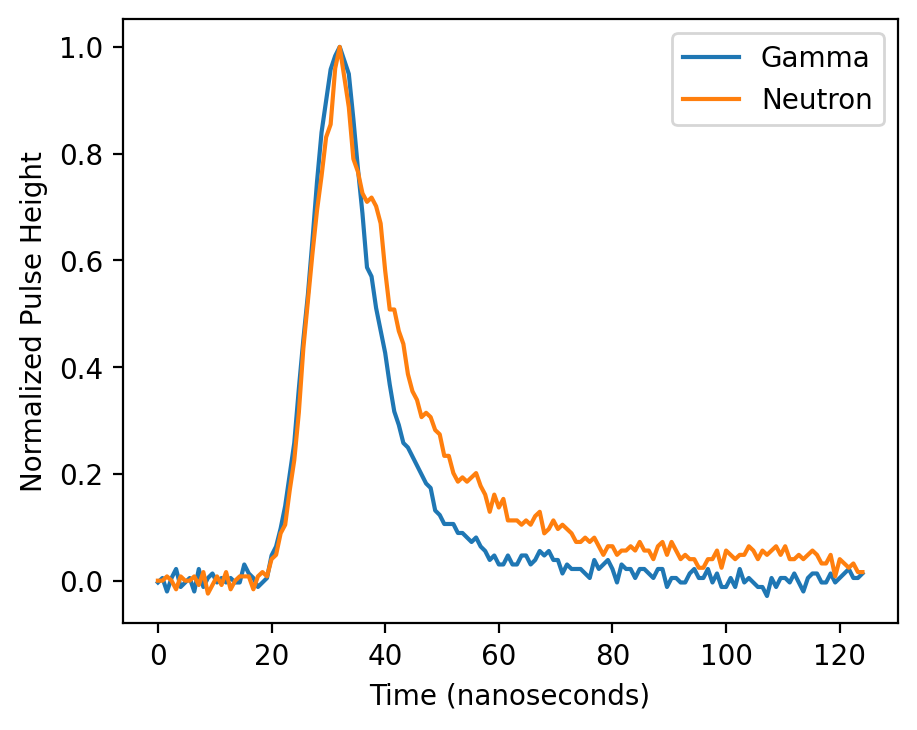

In [179]:
x = np.arange(len(na22[0, 1:]))*0.8

fig = plt.figure(figsize=(5,4), dpi=200)

plt.plot(x, na22[0, 1:]/np.max(na22[0, 1:]), label='Gamma')

p = pube[2, 1:]

x = np.arange(len(p))*0.8
plt.plot(x, p/np.max(p), label='Neutron')


plt.legend()


plt.xlabel('Time (nanoseconds)')
plt.ylabel('Normalized Pulse Height')

In [153]:
pube[0, 1:]

array([[31.547586,  0.9     , -1.1     , ...,  2.9     ,  2.9     ,
         0.9     ],
       [28.304998, -0.3     , -0.3     , ...,  3.7     ,  0.7     ,
         5.7     ],
       [30.542858,  0.      ,  0.      , ...,  4.      ,  2.      ,
         2.      ],
       ...,
       [34.585457,  0.6     , -0.4     , ..., 10.6     ,  9.6     ,
        10.6     ],
       [34.5     ,  1.      ,  0.      , ...,  4.      ,  2.      ,
         2.      ],
       [35.034668, -2.4     ,  0.6     , ...,  1.6     ,  0.6     ,
         2.6     ]])